# 1a. Linear Regression: Visual Neuron

In this section, we will model the response of a simulated neuron responding to the luminance of a visual stimulus, and characterize its "spiking" with linear regression.

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import random
random.seed(2)

Create test data simulating a neuron firing in response to a light stimulus:

In [42]:
# The response will have arbitrary units to represent input intensities
luminance = np.array([list(range(1,11))]).T

What is the spike response to different luminance? Model it as a linear amplification plus baseline and noise. Include a term to introduce experimental error to random trials.

In [43]:
baseline, noise, amp = 10, 2, 2
experimentalError = (np.random.rand(10,1)>.5)*np.random.randn(10,1)*5
spikes = (amp * luminance + baseline + np.random.randn(len(luminance),1)*noise) + experimentalError 

(0.0, 43.589115350464205)

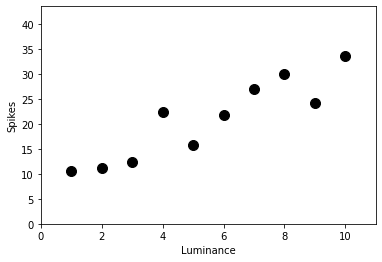

In [44]:
#plot luminance vs Spikes
f1, ax = plt.subplots(nrows=1, ncols=1)
plt.scatter(luminance, spikes, c = 'k',s = 100, ); 
plt.xlabel('Luminance'); plt.ylabel('Spikes')
plt.xlim([0, 11]); plt.ylim([0, max(spikes)[0]+10])

Find a value of beta (i.e., a slope of the regression line) such that when it's multiplied to each of the luminance values, we minimize the distance to the actual measurements (i.e., we look for $\beta_{opt}$ which minimizes $||\overrightarrow{y} - \beta_{Opt} *\overrightarrow{x}||^2$)

In [79]:
#Find betaOpt (optimal beta) via SVD!
#Note that unlike MATLAB, when you do svd, it returns u, s, v; in Python, it returns u, s, v trasponsed!
u, s_diag, v_transpose = np.linalg.svd(luminance)
#a rough pseudo-inverse of S: verify by comparing it to pinv(s)
s = np.zeros(luminance.shape); np.fill_diagonal(s, s_diag)
sInv = np.zeros(luminance.T.shape); np.fill_diagonal(sInv, 1/s_diag)
betaOpt = v_transpose.T @ sInv @ u.T @ spikes
print(betaOpt)

[[3.51036343]]


Now that we have our optimal weight to scale each luminance value, how well does our beta do at predicting the spikes? 

In [88]:
#our prediction is multiplying each luminance value by beta
prediction = luminance @ betaOpt
#get distance between measured spikes and our model prediction
predError = spikes - prediction
#get the squared distance
predErrorOpt = predError.T @ predError
print(predErrorOpt)

[[207.92073455]]


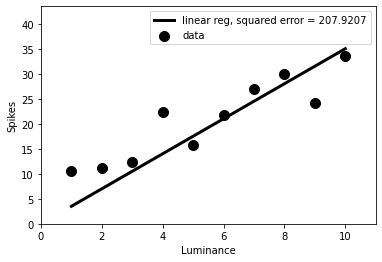

In [53]:
#Plot our prediction
f1, ax = plt.subplots(nrows=1, ncols=1)
plt.scatter(luminance, spikes, c = 'k',s = 100, )
plt.plot(luminance, prediction, c = 'k', lw = 3)
plt.xlabel('Luminance'); plt.ylabel('Spikes')
plt.xlim([0, 11]); plt.ylim([0, max(spikes)[0]+10])
plt.legend({'data', 'linear reg, squared error = %.4f' % predErrorOpt[0][0]})

Was this the best beta? Test a range of other beta values to confirm that your $\beta$ truly
minimizes $||\overrightarrow{y} - \beta_{Opt} * \overrightarrow{x}||^2$

In [63]:
#Try 200 betas over a range of 0:2*betaOpt
numBeta = 200
testBetas = np.linspace(0, betaOpt[0][0]*2, numBeta)
#initialize 
sqrError = np.empty((1,numBeta))
for ii in range(numBeta):
    prediction = testBetas[ii]*luminance
    sqrError[0][ii] = (prediction-spikes).T @ (prediction-spikes)

In [64]:
#now check if predErrorOpt is indeed optimal:
if min(sqrError[0]) >= predErrorOpt:
   #if the closest error you got by force was no smaller than your calculated beta opt....
   print('seems like we found a great solution')

seems like we found a great solution


Text(0, 0.5, 'Error metric')

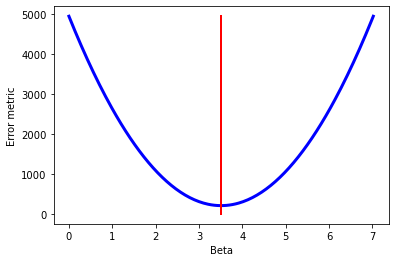

In [67]:
# Now plot the error for different betas
f2, ax = plt.subplots(nrows=1, ncols=1)
#plot the error of your set of test betas
plt.plot(testBetas,sqrError[0],c = 'b', lw = 3)
plt.plot([betaOpt[0][0], betaOpt[0][0]], [0, max(sqrError[0])], c ='r', lw = 2)
plt.xlabel('Beta'); plt.ylabel('Error metric')

# 1b. Multiple linear regression: visual neuron model with y-intercept

What if we would like to add a y-intercept? We can do this with multiple linear regression if we model our independent variable (x) as a matrix whose columns contain the x values of the first order polynomial 

$$y_{\text{Predicted}} = \beta_0* x_0 + \beta_1*x_1.$$ 

Solving this multiple linear regression will produce two beta values, $\beta_0$ (scaling the y intercept term) and Beta1 (scaling the slope of the regression line).

In [68]:
#Create your regressor matrix and calculate the optimal betas with linear algebra
#create your "multivariate" data matrix X (containing x^0 and x^1 as columns)
X = np.array([[1]*10, list(range(1,11))]).T

In [75]:
#Calculate betaOpt with the svd
U, S_diag, V_transpose = np.linalg.svd(X)
SInv = np.zeros(X.T.shape); np.fill_diagonal(SInv, 1/S_diag)
betaOptYInt = V_transpose.T @ SInv @ U.T @ spikes
print(betaOptYInt)

[[7.31444505]
 [2.46544271]]


Now that we have our optimal weight to scale each luminance value, and our y-interecpt, how well does our beta (now a vector) do at predicting the spikes? 

In [85]:
#our prediction is multiplying each luminance value by beta
predictionYInt = X @ betaOptYInt
#get distance between measured spikes and our model prediction
predErrorYInt = spikes - predictionYInt
#get the squared distance
predErrorOptYInt = predErrorYInt.T @ predErrorYInt
print(predErrorOptYInt)

[[93.27550657]]


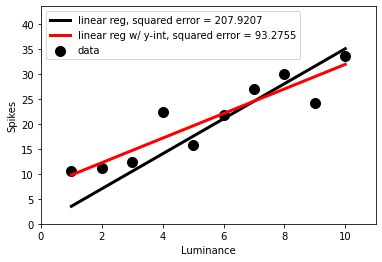

In [89]:
#Plot our prediction with error val
f1, ax = plt.subplots(nrows=1, ncols=1)
plt.scatter(luminance, spikes, c = 'k',s = 100, )
plt.plot(luminance, prediction, c = 'k', lw = 3)
plt.plot(luminance, predictionYInt, c = 'r', lw = 3)
plt.xlabel('Luminance'); plt.ylabel('Spikes')
plt.xlim([0, 11]); plt.ylim([0, max(spikes)[0]+10])
plt.legend({'data', 'linear reg, squared error = %.4f' % predErrorOpt[0][0],
            'linear reg w/ y-int, squared error = %.4f' % predErrorOptYInt[0][0]})
plt.show()

How did our beta do? Test it agaist manually first, create a meshgrid of beta values (equivalent to a 2D version of the beta vector from the last section).

In [96]:
nBetas = 100
beta0  = np.linspace(-betaOptYInt[0][0],betaOptYInt[0][0]*2, nBetas)
beta1  = np.linspace(1,betaOptYInt[1][0]*2, nBetas)

In [100]:
#now compute the errors
allerr = np.empty((nBetas,nBetas))
for ii in range(nBetas):
    for jj in range(nBetas):
        bb = np.array([[beta0[ii],beta1[jj]]]).T
        sqrErr = (X @ bb- spikes).T @ (X @ bb- spikes)
        allerr[ii][jj] = sqrErr[0][0]

plot the contour and compare the old prediction error (without the y-int) with the new prediction error - did you do any better? what does it mean for our neuron that the model with the y-intercept has lower error?

Text(0.5, 0, 'Z Label')

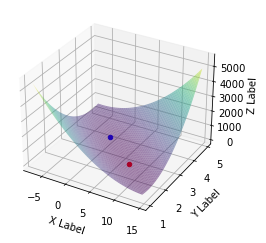

In [117]:
from mpl_toolkits.mplot3d import Axes3D  
fig3 = plt.figure()
ax = plt.axes(projection='3d')
betaX,betaY = np.meshgrid(beta0,beta1);
ax.plot_surface(betaX, betaY, allerr.T, cmap='viridis', edgecolor='none',alpha=0.5)

ax.scatter(betaOptYInt[0][0], betaOptYInt[1][0], predErrorOptYInt, c='r', marker='o')
ax.scatter(0, betaOpt, predErrorOpt, c ='b', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


# 2a. Multiple linear regression: auditory neuron
Now let's try an example of multiple linear regression. The structure mult_linreg contains three fields: freq1, freq2 (the dB intensities of two frequencies of sound stimuli) and response, the response of an auditory neuron. 

In [145]:
#First, load and plot the data ( in 3D!)
#add path if needed
import os
path_str = " "
path = path_str
os.chdir(path)

x_raw = loadmat('mult_linreg.mat')
x = x_raw['data']
data_freq1,data_freq2,data_resp = np.array(x[0][0][0]), np.array(x[0][0][1]), np.array(x[0][0][2])

Text(0.5, 0, 'Firing rate')

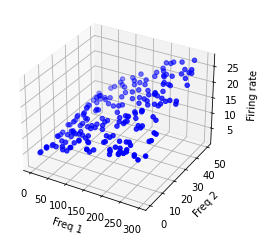

In [148]:
fig5 = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data_freq1, data_freq2, data_resp, c='b', marker='o')
ax.set_xlabel('Freq 1')
ax.set_ylabel('Freq 2')
ax.set_zlabel('Firing rate')


In [174]:
#Perform linear regression
data_freq1_2 = np.concatenate([data_freq1.T,data_freq2.T]).T
U,S_diag,V_transpose = np.linalg.svd(data_freq1_2)
SInv = np.zeros(data_freq1_2.T.shape); np.fill_diagonal(SInv, 1/S_diag)
betaOpt = V_transpose.T @ SInv @ U.T @ data_resp
print(betaOpt)

[[0.0548489 ]
 [0.23561216]]


In [173]:
#Calculate error between the prediction frorm our model, and the measured values
#our prediction is multiplying each luminance value by beta
prediction = data_freq1_2 @ betaOpt
#get distance between measured spikes and our model prediction
predError = data_resp - prediction
#get the squared distance
predErrorOpt = predError.T @ predError

Text(0.5, 0, 'Firing rate')

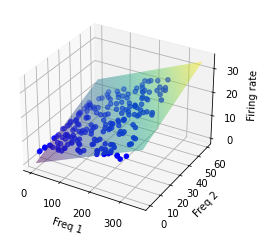

In [175]:
#plot our linear model (it's a plane!)
x = np.linspace(0, max(data_freq1*1.2),100).T
y = np.linspace(0, max(data_freq2*1.2),100).T

xx, yy = np.meshgrid(x,y);
zz = betaOpt[0][0]*xx + betaOpt[1][0]*yy;

fig5 = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(data_freq1, data_freq2, data_resp, c='b', marker='o')
ax.plot_surface(xx,yy,zz, cmap='viridis', edgecolor='none',alpha=0.5)
ax.set_xlabel('Freq 1')
ax.set_ylabel('Freq 2')
ax.set_zlabel('Firing rate')

In [184]:
#Was this the best beta?
#first, create vectors of your possible betas
nBetas = 200

beta0 = np.linspace(0,betaOpt[0]*2,nBetas)
beta1 = np.linspace(0,betaOpt[1]*2,nBetas)

#now compute the errors
allerr = np.empty((nBetas,nBetas))
for ii in range(nBetas):
    for jj in range(nBetas):
        bb = np.array([[beta0[ii][0], beta1[jj][0]]]).T
        sqrErr = (data_freq1_2 @ bb - data_resp).T @ (data_freq1_2 @ bb- data_resp)
        allerr[ii][jj] = sqrErr[0][0]


Text(0.5, 0, 'Firing rate')

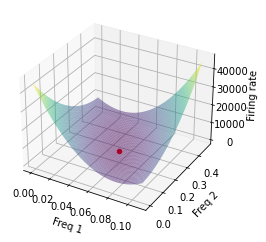

In [190]:
fig6 = plt.figure()
ax = plt.axes(projection='3d')
betaX, betaY = np.meshgrid(beta0,beta1)
ax.plot_surface(betaX, betaY,allerr.T, cmap='viridis', edgecolor='none',alpha=0.5)
ax.scatter(betaOpt[0][0], betaOpt[1][0], predErrorOpt, c='r', marker='o')
ax.set_xlabel('Freq 1')
ax.set_ylabel('Freq 2')
ax.set_zlabel('Firing rate')

# 2b. Multiple Linear Regression: Auditory neuron with baseline firing

What if we suspect the auditory neuron has some baseline firing rate? We might want to include an intercept term in our regression. We can do this the same way we added an intercept term to the standard linear regression: by adding an $x_0$ term to our linear regression.

In [195]:
#Linear Regression 
newX = np.concatenate([np.ones((1,200)), data_freq1.T,data_freq2.T]).T
U,S_diag,V_transpose = np.linalg.svd(newX)
SInv = np.zeros(newX.T.shape); np.fill_diagonal(SInv, 1/S_diag)
betaOpt = V_transpose.T @ SInv @ U.T @ data_resp
print(betaOpt)

[[2.92109991]
 [0.04575482]
 [0.18799423]]


In [196]:
#Calculate error between the prediction frorm our model, and the measured values
prediction = newX @ betaOpt
#get distance between measured spikes and our model prediction
predError = data_resp - prediction
#get the squared distance
predErrorOpt = predError.T @ predError

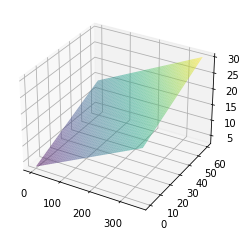

In [200]:
#plot our linear model (it's a plane!)
newBeta0 = np.linspace(0, max(data_freq1)*1.2,nBetas).T
newBeta1 = np.linspace(0, max(data_freq2)*1.2,nBetas).T

newBetaX,newBetaY = np.meshgrid(newBeta0,newBeta1);
newS = betaOpt[0][0]*np.ones(newBetaX.shape)+ betaOpt[1][0]*newBetaX + betaOpt[2][0]*newBetaY


fig7 = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(newBetaX,newBetaY,newS, cmap='viridis', edgecolor='none',alpha=0.5)
